## Project Week05

Yilun Wu (yw528)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from lib.riskmgmt import * # Well this is a bad habit to import as *, but I'm lazy haha
np.random.seed(545) # random seed for consistent result

### Problem 1

In [2]:
# Read data from csv file
data = pd.read_csv('problem1.csv')
data

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284
...,...
495,0.009279
496,-0.001121
497,0.075188
498,0.038520


In [3]:
print(data.mean())

x   -0.00088
dtype: float64


In [4]:
# Fit the data to a normal distribution and a generalized t-distribution
mu, sigma = norm.fit(data['x'])
df, loc, scale = t.fit(data['x'])

In [5]:
# Simulate 10000 samples from the fitted normal distribution and the t-distribution
num_samples = 10000
normal_data = norm.rvs(mu, sigma, size=num_samples)
t_data = t.rvs(df, loc, scale, size=num_samples)

In [6]:
# Compute VaR and ES for both fitted distributions
VaR_norm = compute_VaR(normal_data, mean=mu)
ES_norm = compute_ES(normal_data, mean=mu)
VaR_t = compute_VaR(t_data)
ES_t = compute_ES(t_data)
print('VaR for normal distribution: ', VaR_norm)
print('VaR for t-distribution: ', VaR_t)
print('ES for normal distribution: ', ES_norm)
print('ES for t-distribution: ', ES_t)

VaR for normal distribution:  0.08065427472189039
VaR for t-distribution:  0.07771385789439149
ES for normal distribution:  0.10162599454677766
ES for t-distribution:  0.12290680613339872


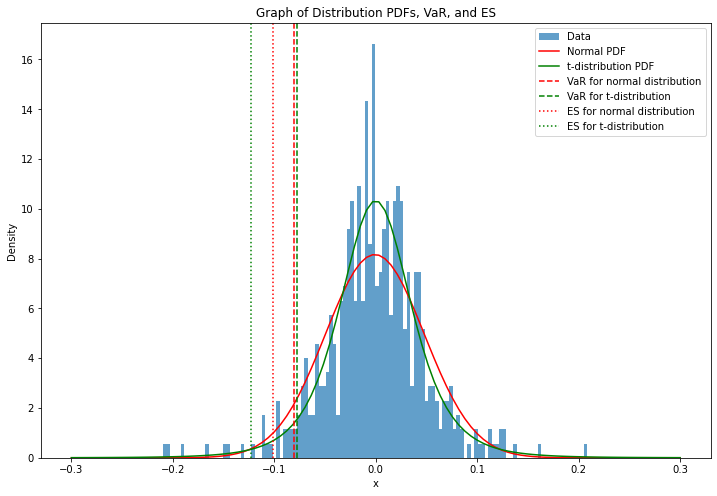

In [7]:
# Overlay the graphs the distribution PDFs, VaR, and ES values
xnorm = np.linspace(-0.3, 0.3, num=100)
pdf_norm = norm.pdf(xnorm, mu, sigma)
pdf_t = t.pdf(xnorm, df, loc, scale)
plt.figure(figsize=(12, 8))
plt.hist(data, bins=120, density=True, alpha=0.7, label='Data')
plt.plot(xnorm, pdf_norm, color='red', label='Normal PDF')
plt.plot(xnorm, pdf_t, color='green', label='t-distribution PDF')
plt.axvline(x=-VaR_norm, color='red', linestyle='--', label='VaR for normal distribution')
plt.axvline(x=-VaR_t, color='green', linestyle='--', label='VaR for t-distribution')
plt.axvline(x=-ES_norm, color='red', linestyle=':', label='ES for normal distribution')
plt.axvline(x=-ES_t, color='green', linestyle=':', label='ES for t-distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Graph of Distribution PDFs, VaR, and ES')
plt.legend()
plt.show()

### Problem 2

The library for risk management is located in riskmgmt.py in lib folder in the main directory.

#### Tests

In [8]:
# Read data from csv file
dailyPrices = pd.read_csv('DailyPrices.csv')
dailyPrices

,Date,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
0,2022-09-01,388.679565,157.028442,257.908386,127.820000,139.243423,109.739998,277.160004,110.550003,282.429993,...,282.124664,136.138718,36.036259,123.325203,70.653595,424.766022,158.011505,46.662727,40.990002,249.972107
1,2022-09-02,384.581177,154.891113,253.609909,127.510002,136.346054,107.849998,270.209991,108.680000,277.670013,...,281.791626,134.696564,37.229321,122.039116,69.294113,422.966797,155.602798,46.748875,40.490002,243.384186
2,2022-09-06,383.130066,153.618668,250.826813,126.110001,134.527710,106.809998,274.420013,107.480003,276.589996,...,280.483856,135.834595,36.703716,122.108894,69.422180,419.574921,155.464035,46.155418,40.380001,246.615067
3,2022-09-07,390.013000,155.040237,255.620483,129.479996,137.056152,109.449997,283.700012,110.480003,281.040009,...,285.154480,138.591293,36.408989,126.814598,70.722557,424.726715,158.992813,46.547867,41.470001,251.776749
4,2022-09-08,392.562256,153.549088,256.046387,129.820007,139.814484,108.379997,289.260010,109.419998,283.339996,...,285.852631,140.523956,37.499485,128.828476,72.072182,431.766174,157.099579,47.763493,42.709999,253.882172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2023-09-18,443.630005,177.970001,329.059998,139.979996,439.660004,138.210007,265.279999,138.960007,370.429993,...,285.339996,219.149994,61.209999,140.559998,57.860001,635.650024,179.649994,42.639999,53.000000,179.529999
262,2023-09-19,442.709991,179.070007,328.649994,137.630005,435.200012,138.039993,266.500000,138.830002,370.480011,...,284.640015,216.160004,60.430000,142.470001,57.730000,625.150024,181.979996,42.680000,53.029999,177.360001
263,2023-09-20,438.640015,175.490005,320.769989,135.289993,422.390015,133.740005,262.589996,134.589996,366.820007,...,287.329987,214.649994,59.790001,142.690002,56.669998,618.859985,181.479996,42.299999,54.099998,177.410004
264,2023-09-21,431.390015,173.929993,319.529999,129.330002,410.170013,130.440002,255.699997,131.360001,363.279999,...,290.839996,210.649994,58.820000,142.399994,56.009998,610.390015,176.630005,41.709999,53.970001,169.320007


##### Covariance estimation techniques

In [9]:
dailyReturn_from_calculation = return_calculate(dailyPrices)
dailyReturn_from_calculation.drop('Date', axis=1, inplace=True)
dailyReturn_from_calculation

/Users/wuyilun/Desktop/FINTECH545/lib/riskmgmt.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]
/Users/wuyilun/Desktop/FINTECH545/lib/riskmgmt.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]


,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,META,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
0,-0.010544,-0.013611,-0.016667,-0.002425,-0.020808,-0.017223,-0.025076,-0.016915,-0.016854,-0.030479,...,-0.001180,-0.010593,0.033107,-0.010428,-0.019242,-0.004236,-0.015244,0.001846,-0.012198,-0.026355
1,-0.003773,-0.008215,-0.010974,-0.010980,-0.013336,-0.009643,0.015581,-0.011042,-0.003890,-0.011103,...,-0.004641,0.008449,-0.014118,0.000572,0.001848,-0.008019,-0.000892,-0.012695,-0.002717,0.013275
2,0.017965,0.009254,0.019111,0.026723,0.018795,0.024717,0.033817,0.027912,0.016089,0.011669,...,0.016652,0.020295,-0.008030,0.038537,0.018731,0.012279,0.022698,0.008503,0.026994,0.020930
3,0.006536,-0.009618,0.001666,0.002626,0.020126,-0.009776,0.019598,-0.009595,0.008184,0.010412,...,0.002448,0.013945,0.029951,0.015880,0.019083,0.016574,-0.011908,0.026116,0.029901,0.008362
4,0.015535,0.018840,0.022977,0.026575,0.028377,0.020945,0.036023,0.021568,0.008576,0.043749,...,0.007327,0.017244,0.038774,-0.004179,0.018863,0.026460,0.036721,0.015431,0.005385,-0.000306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.000586,0.016913,-0.003513,-0.002920,0.001503,0.005895,-0.033201,0.004772,0.006986,0.007459,...,0.007485,0.006938,0.010399,0.013118,-0.006183,0.020125,-0.003329,-0.001639,0.001890,-0.003386
261,-0.002074,0.006181,-0.001246,-0.016788,-0.010144,-0.001230,0.004599,-0.000936,0.000135,0.008329,...,-0.002453,-0.013644,-0.012743,0.013589,-0.002247,-0.016519,0.012970,0.000938,0.000566,-0.012087
262,-0.009193,-0.019992,-0.023977,-0.017002,-0.029435,-0.031150,-0.014672,-0.030541,-0.009879,-0.017701,...,0.009450,-0.006986,-0.010591,0.001544,-0.018361,-0.010062,-0.002748,-0.008903,0.020177,0.000282
263,-0.016528,-0.008889,-0.003866,-0.044053,-0.028931,-0.024675,-0.026239,-0.023999,-0.009651,-0.013148,...,0.012216,-0.018635,-0.016223,-0.002032,-0.011646,-0.013686,-0.026725,-0.013948,-0.002403,-0.045601


In [10]:
ew_cov_matrix = compute_ew_cov_matrix(dailyReturn_from_calculation, _lambda=0.97)
pd.DataFrame(ew_cov_matrix)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000055,0.000068,0.000071,0.000092,0.000118,0.000075,0.000136,0.000076,3.258238e-05,0.000097,...,1.156435e-05,0.000056,0.000048,-0.000008,0.000071,0.000086,0.000058,0.000045,0.000016,0.000055
1,0.000068,0.000197,0.000092,0.000048,0.000154,0.000101,0.000172,0.000103,3.032456e-05,0.000128,...,1.426056e-05,0.000060,0.000045,-0.000010,0.000073,0.000123,0.000086,0.000019,0.000013,0.000042
2,0.000071,0.000092,0.000193,0.000148,0.000212,0.000105,0.000227,0.000107,2.560756e-05,0.000163,...,1.194797e-05,0.000068,0.000016,-0.000049,0.000083,0.000132,0.000035,0.000027,0.000015,0.000017
3,0.000092,0.000048,0.000148,0.000400,0.000221,0.000170,0.000300,0.000174,3.243473e-05,0.000214,...,-2.998406e-06,0.000075,0.000042,-0.000068,0.000030,0.000182,0.000048,0.000059,0.000007,0.000094
4,0.000118,0.000154,0.000212,0.000221,0.000781,0.000206,0.000333,0.000207,4.433838e-05,0.000291,...,9.364031e-07,0.000119,0.000052,-0.000103,0.000121,0.000376,0.000046,0.000072,0.000026,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000086,0.000123,0.000132,0.000182,0.000376,0.000132,0.000165,0.000134,3.462994e-05,0.000241,...,-2.932680e-05,0.000102,0.000043,-0.000057,0.000049,0.000483,0.000045,0.000054,0.000015,0.000029
97,0.000058,0.000086,0.000035,0.000048,0.000046,0.000076,0.000084,0.000076,3.717161e-05,0.000063,...,3.644600e-05,0.000046,0.000071,0.000014,0.000084,0.000045,0.000248,0.000026,0.000045,0.000098
98,0.000045,0.000019,0.000027,0.000059,0.000072,0.000041,0.000107,0.000041,4.911266e-05,0.000062,...,-6.633788e-06,-0.000005,0.000088,0.000013,0.000135,0.000054,0.000026,0.000167,-0.000012,0.000065
99,0.000016,0.000013,0.000015,0.000007,0.000026,0.000010,0.000050,0.000009,5.281758e-07,0.000041,...,1.689267e-05,0.000041,0.000004,-0.000006,0.000007,0.000015,0.000045,-0.000012,0.000154,0.000021


##### Non PSD fixes for correlation matrices

In [11]:
# Generate a non-psd correlation matrix that is 500x500
n = 500
corr = np.zeros((n, n))
corr.fill(0.9)
for i in range(n): corr[i, i] = 1.0
corr[0, 1] = 0.7357
corr[1, 0] = 0.7357

# Use near_psd() and Higham’s method to fix the matrix. Confirm the matrix is now PSD.
assert not is_psd(corr)
assert is_psd(near_psd(corr, epsilon=1e-8))
assert is_psd(higham_near_psd(corr))

##### Simulation Methods

In [12]:
# Direct Simulation
data1 = multi_norm_sim(ew_cov_matrix, 10000, sim='direct') 
pd.DataFrame(data1)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-0.003921,-0.024506,0.006616,0.010348,-0.010729,-0.023513,-0.024355,-0.023916,-0.000085,-0.001622,...,0.016795,0.001479,-0.001843,0.003750,-0.014540,0.013973,0.008764,-0.006181,0.012597,-0.004447
1,-0.004062,-0.006034,-0.021999,0.002938,-0.027365,-0.003557,-0.023318,-0.004147,-0.006694,-0.017417,...,-0.008116,0.011969,-0.004841,0.001317,-0.008261,-0.010279,-0.002632,-0.004549,-0.000313,0.000613
2,-0.010018,-0.005953,-0.012525,-0.028647,0.002651,-0.029866,0.022348,-0.030157,-0.011798,-0.014226,...,-0.009762,0.007296,-0.019617,-0.023356,-0.023425,0.006429,-0.017701,-0.013543,0.006236,-0.008530
3,-0.006443,-0.020680,-0.021093,-0.011295,-0.009519,0.009581,-0.022490,0.009063,-0.004484,-0.013898,...,-0.010378,-0.007977,-0.002398,0.005840,-0.030212,-0.023016,-0.009404,0.002528,-0.007548,0.010956
4,0.013058,0.007541,-0.002274,0.032985,0.015373,0.010866,0.018724,0.009781,0.015555,0.040835,...,0.009776,0.017765,-0.007700,0.027748,0.013138,0.032851,0.026760,0.020813,-0.007501,-0.002964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.009965,-0.003048,-0.015951,0.000055,0.029136,0.010941,-0.050252,0.013294,-0.001926,-0.025338,...,-0.025708,-0.016740,-0.003521,0.010613,-0.026947,-0.007573,-0.019594,-0.014682,-0.030123,-0.011809
9996,0.007840,0.006780,0.016794,0.024057,0.031890,0.008841,0.030416,0.010806,0.007384,0.037896,...,0.002194,0.030698,-0.005589,-0.012728,0.010770,0.029538,-0.025725,0.003458,-0.009970,0.002687
9997,0.009942,0.023103,0.007128,0.043673,0.007483,0.014177,0.028909,0.014675,0.006405,0.050929,...,0.020186,-0.013457,0.015686,0.010377,0.007630,0.016862,0.003131,0.020684,0.001652,-0.016488
9998,-0.000943,0.009835,-0.007158,-0.028129,0.024256,-0.000190,-0.019546,-0.000074,-0.004840,-0.019853,...,-0.021195,0.007493,-0.037579,0.042180,-0.002775,0.029412,-0.024568,0.000070,0.002814,-0.011831


In [13]:
# PCA with 100% explained
data2 = multi_norm_sim(ew_cov_matrix, 10000, var_explained=1.0, sim='PCA') 
pd.DataFrame(data2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.004634,-0.000783,-0.008052,0.010188,0.012797,0.020150,0.034808,0.017774,0.014195,0.014986,...,0.014693,0.010362,0.036509,0.001647,0.043577,-0.010320,0.005433,0.027612,0.016923,0.031702
1,0.002760,0.000337,-0.012170,-0.017945,0.010356,-0.010542,-0.017287,-0.009598,0.001465,-0.008682,...,0.037583,0.006035,-0.001697,0.026422,-0.004990,0.025727,-0.000524,0.001432,0.001608,0.022582
2,-0.007543,-0.004754,-0.019253,0.001943,-0.014409,-0.017048,-0.001407,-0.019398,-0.015604,-0.007748,...,0.019579,0.011697,0.001424,-0.052921,0.004355,-0.013718,-0.026156,-0.010238,-0.000953,-0.009832
3,-0.011255,-0.008398,-0.014936,-0.024688,-0.038117,-0.007770,-0.049208,-0.007163,0.005393,-0.041823,...,0.021738,-0.026327,0.014947,-0.006667,-0.008946,-0.040047,-0.000961,0.000664,-0.002820,-0.002844
4,0.003923,-0.003951,0.005275,-0.005677,0.022205,0.005111,0.003769,0.006222,0.009003,0.005459,...,0.007233,-0.012116,0.015801,0.005913,0.020031,0.018653,0.005151,0.009677,-0.001848,-0.010149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.005913,0.004670,0.005239,0.016570,-0.005448,-0.003169,0.033669,-0.001790,0.001903,0.016360,...,0.011711,0.010143,0.021740,0.006488,0.006438,-0.005551,0.020397,-0.010676,0.021814,0.025933
9996,0.002818,-0.005515,-0.005443,0.026007,-0.017414,-0.000767,0.010315,0.000166,0.009589,-0.031332,...,-0.000084,-0.005734,0.023350,0.004535,-0.020121,-0.003203,0.010516,0.022567,-0.029435,0.004450
9997,-0.007661,0.004943,-0.000642,-0.035991,-0.033392,-0.028135,-0.027657,-0.029136,-0.003979,-0.020262,...,0.020985,0.004007,0.004204,0.020519,0.014389,-0.036116,-0.024014,-0.002491,-0.010049,-0.005910
9998,0.004912,-0.003083,0.002916,-0.003547,0.010165,-0.000132,-0.036449,0.000785,0.003579,0.017030,...,-0.017152,0.025960,-0.010211,0.000848,0.021715,0.016575,0.013860,0.018879,0.003714,0.008890


In [14]:
# PCA with 75% explained
data3 = multi_norm_sim(ew_cov_matrix, 10000, var_explained=0.75, sim='PCA') 
pd.DataFrame(data3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-0.000951,-0.009003,-0.018452,-0.008101,-0.038571,0.001062,-0.002021,0.000192,0.014476,-0.002135,...,-0.007105,-0.016114,0.024673,0.041458,0.024306,-0.022775,-0.006524,0.031611,-0.006960,0.000747
1,-0.010120,-0.014515,-0.013875,-0.027103,-0.013159,-0.018319,-0.041494,-0.018974,-0.001041,-0.025592,...,-0.000882,-0.016236,-0.009039,0.021373,0.007578,-0.026249,-0.008447,-0.000083,-0.005379,-0.023514
2,0.007904,0.017201,0.014654,0.022380,0.007141,0.011627,-0.006156,0.011957,0.001994,0.013237,...,-0.005312,0.003626,-0.004821,0.007769,-0.018384,0.014000,0.023889,-0.010292,0.005596,-0.006267
3,0.001236,-0.003322,0.003810,0.009761,0.005542,-0.010569,0.026567,-0.011122,-0.001792,0.024177,...,0.028577,-0.011171,0.014819,-0.043124,0.022890,0.023453,-0.010665,0.022385,0.002260,0.002628
4,-0.006415,0.001778,0.001959,-0.001296,0.008946,-0.013203,0.048553,-0.012981,-0.006733,0.005842,...,0.018175,-0.022223,-0.006426,0.009683,-0.034162,0.004492,-0.002143,-0.013788,-0.008874,-0.023273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.005937,0.013818,0.006502,0.012651,0.014329,0.008245,-0.002905,0.008869,-0.003026,0.002432,...,-0.012933,-0.005455,-0.004902,-0.016947,-0.018514,0.025977,0.003058,0.006481,-0.006074,0.015972
9996,0.004191,0.000593,0.010449,0.017503,0.031961,0.008525,0.022897,0.008732,-0.004483,0.012217,...,0.014818,0.008589,-0.020093,-0.022589,-0.008631,0.003633,0.012065,-0.013784,0.012009,0.013179
9997,-0.002051,-0.005182,-0.000223,0.008145,0.055243,0.019306,-0.043830,0.019342,-0.003970,-0.000962,...,-0.021027,-0.004828,-0.016174,-0.001847,-0.019194,0.019921,-0.006203,-0.010717,-0.006900,-0.005271
9998,0.005568,0.007189,-0.008821,-0.015311,-0.001760,-0.001020,-0.030137,-0.001101,0.007001,0.001279,...,-0.009340,0.014158,0.011963,0.003834,0.026059,0.011322,0.022265,0.012176,0.006110,0.015913


In [15]:
# PCA with 50% explained
data4 = multi_norm_sim(ew_cov_matrix, 10000, var_explained=0.5, sim='PCA') 
pd.DataFrame(data4)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.002999,0.002939,0.003418,0.001755,0.000503,-0.002887,-0.040353,-0.003069,0.006331,0.008463,...,0.011959,0.016690,0.011470,0.016769,0.011956,0.016815,0.012590,-0.003774,0.000770,-0.006915
1,0.004855,0.006630,0.010686,0.015104,-0.002880,0.008072,0.024879,0.008369,0.000938,0.015282,...,0.012638,0.012969,-0.009959,0.000909,-0.009210,-0.001613,0.012761,-0.014109,0.009942,0.005769
2,0.003491,0.003685,0.001216,0.002622,0.014446,0.005983,-0.026771,0.006128,0.001894,-0.000383,...,-0.010817,0.011346,0.003857,0.001345,0.002310,0.015209,0.004477,0.001163,0.000651,0.006814
3,-0.002599,-0.000254,0.005186,0.002958,0.002510,-0.002593,-0.005004,-0.002506,-0.003357,0.008312,...,0.007296,0.004583,-0.010796,0.000715,-0.014699,0.008673,-0.001654,-0.016813,0.002296,-0.012346
4,0.010887,0.012839,0.013781,0.022564,0.026307,0.021241,0.070810,0.021643,0.002010,0.016375,...,-0.007681,0.001155,-0.000315,-0.017536,0.004644,0.005548,0.004513,0.012772,0.005076,0.021663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.012249,0.011288,0.008334,0.019624,-0.007034,0.018691,0.046555,0.019090,0.006448,0.009491,...,0.004912,0.014133,0.000199,-0.001185,0.007215,-0.016564,0.022978,0.004400,0.012682,0.031894
9996,0.006074,0.007862,0.008070,0.012175,0.024682,0.013091,0.013575,0.013408,0.000447,0.008391,...,-0.011387,0.007725,-0.001261,-0.008831,-0.001588,0.015920,0.002323,0.002637,0.002622,0.010809
9997,0.002656,-0.000148,-0.003101,-0.001987,-0.022845,-0.003856,-0.002529,-0.004131,0.007068,-0.000853,...,0.015587,0.003049,0.012978,0.013836,0.018820,-0.015080,0.013063,0.007522,0.001414,0.004556
9998,0.004491,0.002955,0.002107,0.004600,-0.017123,0.000227,0.007323,0.000093,0.006645,0.006150,...,0.017290,0.007487,0.008632,0.011662,0.013970,-0.010360,0.015397,0.002491,0.004296,0.005508


##### VaR calculation methods (all discussed)

In [16]:
meta = dailyReturn_from_calculation['META']
VaR = calculate_VaR_normal(meta)
print("VaR of META using a normal distribution is", round(VaR, 10))
VaR = calculate_VaR_normal_ew(meta)
print("VaR of META using a normal distribution with an Exponentially Weighted variance is", round(VaR, 10))
VaR = calculate_VaR_t_MLE(meta)
print("VaR of META using a MLE fitted t distribution is", round(VaR, 10))
VaR = calculate_VaR_AR1(meta)
print("VaR of META using a fitted AR(1) model is", round(VaR, 10))
VaR = calculate_VaR_historic(meta)
print("VaR of META using a Historic Simulation is", round(VaR, 10))

VaR of META using a normal distribution is 0.0590853787
VaR of META using a normal distribution with an Exponentially Weighted variance is 0.028867878
VaR of META using a MLE fitted t distribution is 0.0388754323
VaR of META using a fitted AR(1) model is 0.0618156158
VaR of META using a Historic Simulation is 0.0366971136


##### ES calculation

In [17]:
ES_norm = compute_ES(normal_data, mean=mu)
ES_t = compute_ES(t_data)
print('ES for normal distribution: ', ES_norm)
print('ES for t-distribution: ', ES_t)

ES for normal distribution:  0.10162599454677766
ES for t-distribution:  0.12290680613339872


### Problem 3

In [18]:
# Read data from csv file
portfolio = pd.read_csv('portfolio.csv')

In [19]:
# helper function for computing portfolio value and current prices for each stock
def compute_PV_prices(portfolio, prices):
    curr_prices = []
    pv = 0
    for stock in portfolio['Stock']:
        holding = portfolio[portfolio['Stock'] == stock]['Holding'].iloc[0]
        curr_price = prices[stock].iloc[-1]
        pv += holding*curr_price
        curr_prices.append(curr_price)
    return pv, curr_prices

In [20]:
portfolio_names = ['A', 'B', 'C', 'all']
num_samples = 10000

for portfolio_name in portfolio_names:
    if portfolio_name == 'all': portfolio_sub = portfolio
    else: portfolio_sub = portfolio[portfolio['Portfolio'] == portfolio_name]
    pv, prices = compute_PV_prices(portfolio_sub, dailyPrices)
    prices_sub = dailyPrices[['Date']+[stock for stock in portfolio_sub['Stock']]]
    returns = return_calculate(prices_sub, method='DISCRETE')
    returns.drop('Date', axis=1, inplace=True)

    return_t_cdf = [] # t-distribution CDF of returns
    params = [] # parameters of the fitted t-distribution
    for col in returns.columns:
        df, loc, scale = t.fit(returns[col].values)
        params.append((df, loc, scale))
        return_t_cdf.append(t.cdf(returns[col].values, df=df, loc=loc, scale=scale).tolist())
    return_t_cdf = pd.DataFrame(return_t_cdf).T
    return_corr = return_t_cdf.corr(method='spearman')
    sim_t_dist = pd.DataFrame(multi_norm_sim(return_corr, num_samples=num_samples, sim='PCA'))
    sim_t_cdf = []
    for col in sim_t_dist.columns:
        sim_t_cdf.append(norm.cdf(sim_t_dist[col].values, loc=0, scale=1).tolist())
    return_sim_t =[]
    for i in range(len(sim_t_cdf)):
        return_sim_t.append(t.ppf(sim_t_cdf[i], df=params[i][0], loc=params[i][1], scale=params[i][2]))
    prices_sim_t = ((np.array(return_sim_t).T+1)*np.array(prices))
    pv_sim_t = prices_sim_t@np.array(portfolio_sub['Holding']).reshape(-1, 1)
    VaR = compute_VaR(pv_sim_t, mean=pv)
    ES = compute_ES(pv-pv_sim_t)
    if portfolio_name == 'all':  
        print(f'VaR for all portfolios is ${VaR}')
        print(f'ES for all portfolios is ${ES}')
    else: 
        print(f'VaR for Portfolio {portfolio_name} is ${VaR}')
        print(f'ES for Portfolio {portfolio_name} is ${ES}')

VaR for Portfolio A is $20342.538745009108
ES for Portfolio A is $28612.409009969117
VaR for Portfolio B is $11601.290390482172
ES for Portfolio B is $16214.008658866856
VaR for Portfolio C is $25202.349184515886
ES for Portfolio C is $37015.4750241474


/Users/wuyilun/Desktop/FINTECH545/lib/riskmgmt.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]


VaR for all portfolios is $55485.299239112996
ES for all portfolios is $80157.82229706255
